In [ ]:
import numpy as np

# Генерация выборок

---



In [ ]:
np.random.seed(42)

# Общие параметры
n = 100  # Размер каждой подвыборки
std = 1  # Стандартное отклонение
var = std**2

# Первая выборка (близкие средние)
group1 = np.random.normal(loc=5.0, scale=std, size=n)
group2 = np.random.normal(loc=5.2, scale=std, size=n)
group3 = np.random.normal(loc=4.9, scale=std, size=n)

# Вторая выборка (сильно разные средние )
group4 = np.random.normal(loc=2.0, scale=std, size=n)
group5 = np.random.normal(loc=5.0, scale=std, size=n)
group6 = np.random.normal(loc=8.0, scale=std, size=n)


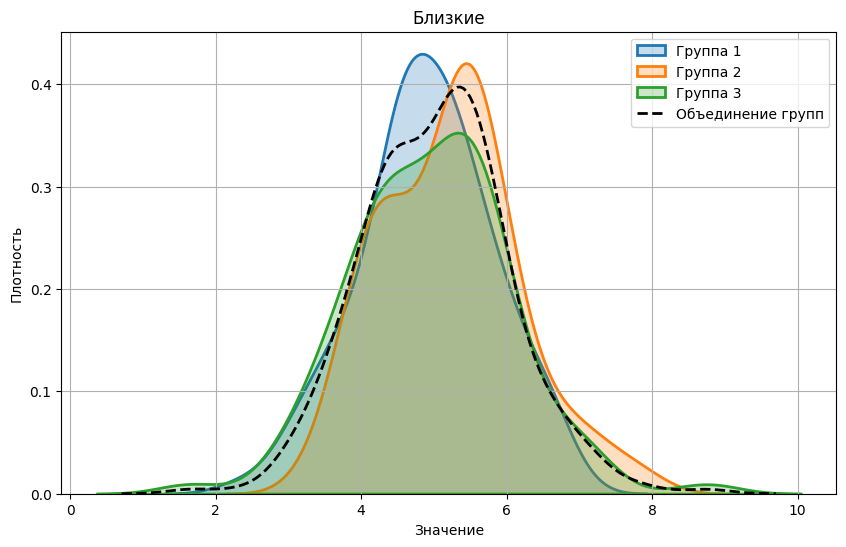

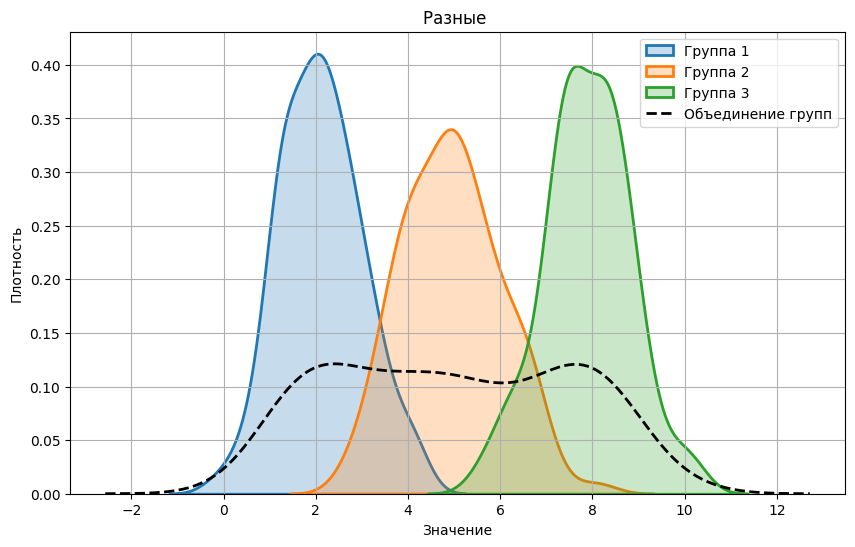

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Функция визуализации
def plot_kde(groups, title):
    plt.figure(figsize=(10, 6))

    # Отдельные KDE по группам
    for i, g in enumerate(groups):
        sns.kdeplot(g, fill=True, label=f'Группа {i+1}', linewidth=2)

    # Объединённые данные
    all_data = np.concatenate(groups)
    sns.kdeplot(all_data, color='black', linestyle='--', linewidth=2, label='Объединение групп')

    plt.title(title)
    plt.xlabel("Значение")
    plt.ylabel("Плотность")
    plt.grid(True)
    plt.legend()
    plt.show()

# Визуализация первой выборки (близкие средние)
plot_kde([group1, group2, group3], "Близкие")

# Визуализация второй выборки (разные средние)
plot_kde([group4, group5, group6], "Разные ")


# Парные тесты

---



Парный тест для проверки гипотезы о равенстве математических ожиданий
при известных дисперсиях

In [ ]:
from scipy.stats import norm

def z_test_known_variance(x1, x2, sigma_squared, alpha=0.05):
    n = len(x1)
    mean1, mean2 = np.mean(x1), np.mean(x2)

    z = (mean1 - mean2) / np.sqrt(2 * sigma_squared / n)
    z_crit = norm.ppf(1 - alpha/2)  # двусторонний тест

    reject = abs(z) > z_crit
    return z, z_crit, reject


In [ ]:
def run_z_tests(groups, label, sigma_squared=1, alpha=0.05):
    print(f"\n=== Z-тесты при известных дисперсиях для {label} ===")
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            z, z_crit, reject = z_test_known_variance(groups[i], groups[j], sigma_squared, alpha)
            result = "ОТКЛОНЯЕМ H₀" if reject else "НЕ отклоняем H₀"
            print(f"Группа {i+1} vs Группа {j+1}: Z = {z:.2f}, Z_crit = ±{z_crit:.2f} → {result}")


In [ ]:
run_z_tests([group1, group2, group3], "Выборка 1 (близкие ожидания)")
run_z_tests([group4, group5, group6], "Выборка 2 (разные ожидания)")



=== Z-тесты при известных дисперсиях для Выборка 1 (близкие ожидания) ===
Группа 1 vs Группа 2: Z = -2.31, Z_crit = ±1.96 → ОТКЛОНЯЕМ H₀
Группа 1 vs Группа 3: Z = -0.49, Z_crit = ±1.96 → НЕ отклоняем H₀
Группа 2 vs Группа 3: Z = 1.82, Z_crit = ±1.96 → НЕ отклоняем H₀

=== Z-тесты при известных дисперсиях для Выборка 2 (разные ожидания) ===
Группа 1 vs Группа 2: Z = -20.06, Z_crit = ±1.96 → ОТКЛОНЯЕМ H₀
Группа 1 vs Группа 3: Z = -40.86, Z_crit = ±1.96 → ОТКЛОНЯЕМ H₀
Группа 2 vs Группа 3: Z = -20.79, Z_crit = ±1.96 → ОТКЛОНЯЕМ H₀


Парный тест для проверки гипотезы о равенстве математических ожиданий
при неизвестных, но равных дисперсиях

In [ ]:
from scipy.stats import ttest_ind

def run_t_tests(groups, label, alpha=0.05):
    print(f"\n=== t-тесты при неизвестных, но равных дисперсиях для {label} ===")
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            stat, p = ttest_ind(groups[i], groups[j], equal_var=True)
            result = "ОТКЛОНЯЕМ H₀" if p < alpha else "НЕ отклоняем H₀"
            print(f"Группа {i+1} vs Группа {j+1}: t = {stat:.2f}, p = {p:.4f} → {result}")


In [ ]:
run_t_tests([group1, group2, group3], "Выборка 1 (близкие ожидания)")
run_t_tests([group4, group5, group6], "Выборка 2 (разные ожидания)")



=== t-тесты при неизвестных, но равных дисперсиях для Выборка 1 (близкие ожидания) ===
Группа 1 vs Группа 2: t = -2.48, p = 0.0141 → ОТКЛОНЯЕМ H₀
Группа 1 vs Группа 3: t = -0.49, p = 0.6275 → НЕ отклоняем H₀
Группа 2 vs Группа 3: t = 1.78, p = 0.0762 → НЕ отклоняем H₀

=== t-тесты при неизвестных, но равных дисперсиях для Выборка 2 (разные ожидания) ===
Группа 1 vs Группа 2: t = -20.51, p = 0.0000 → ОТКЛОНЯЕМ H₀
Группа 1 vs Группа 3: t = -45.19, p = 0.0000 → ОТКЛОНЯЕМ H₀
Группа 2 vs Группа 3: t = -20.88, p = 0.0000 → ОТКЛОНЯЕМ H₀


ANOVA

---



In [ ]:
from scipy.stats import f_oneway

def run_anova(groups, label):
    f_stat, p_val = f_oneway(*groups)
    result = "ОТКЛОНЯЕМ H₀" if p_val < 0.05 else "НЕ отклоняем H₀"
    print(f"\n=== ANOVA для {label} ===")
    print(f"F = {f_stat:.2f}, p = {p_val:.4f} → {result}")


In [ ]:
run_anova([group1, group2, group3], "Выборка 1 (близкие ожидания)")
run_anova([group4, group5, group6], "Выборка 2 (разные ожидания)")



=== ANOVA для Выборка 1 (близкие ожидания) ===
F = 3.05, p = 0.0490 → ОТКЛОНЯЕМ H₀

=== ANOVA для Выборка 2 (разные ожидания) ===
F = 905.27, p = 0.0000 → ОТКЛОНЯЕМ H₀


# Анализ

---



In [ ]:
import time

# t-тесты
start = time.time()
run_t_tests([group1, group2, group3], "Timing test")
print("t-тесты заняли:", time.time() - start, "сек")

# ANOVA
start = time.time()
run_anova([group1, group2, group3], "Timing test")
print("ANOVA заняла:", time.time() - start, "сек")



=== t-тесты при неизвестных, но равных дисперсиях для Timing test ===
Группа 1 vs Группа 2: t = -2.48, p = 0.0141 → ОТКЛОНЯЕМ H₀
Группа 1 vs Группа 3: t = -0.49, p = 0.6275 → НЕ отклоняем H₀
Группа 2 vs Группа 3: t = 1.78, p = 0.0762 → НЕ отклоняем H₀
t-тесты заняли: 0.007534503936767578 сек

=== ANOVA для Timing test ===
F = 3.05, p = 0.0490 → ОТКЛОНЯЕМ H₀
ANOVA заняла: 0.0010340213775634766 сек


<ipython-input-13-2242967746>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Value", data=df, palette="Set2")


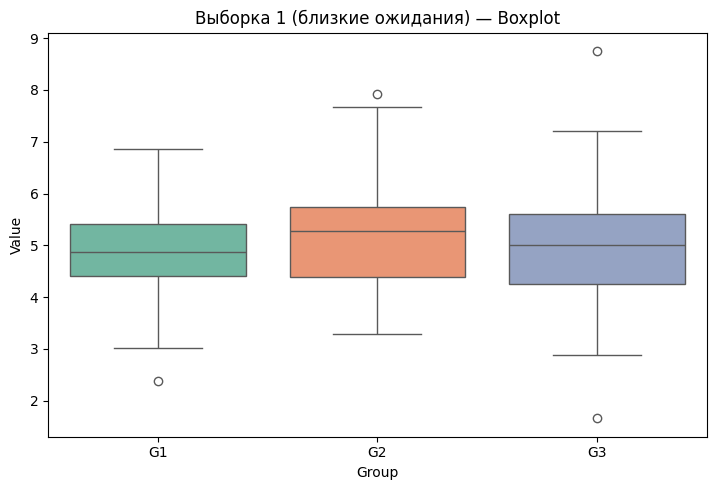

<ipython-input-13-2242967746>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Value", data=df, palette="Set2")


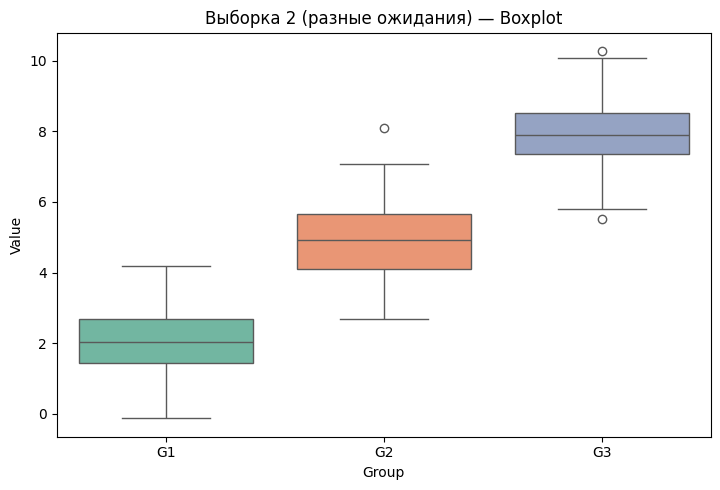

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Создание DataFrame для визуализации
def create_dataframe(groups, label_prefix):
    data = []
    for i, group in enumerate(groups, 1):
        for val in group:
            data.append({"Group": f"{label_prefix}{i}", "Value": val})
    return pd.DataFrame(data)

df1 = create_dataframe([group1, group2, group3], "G")
df2 = create_dataframe([group4, group5, group6], "G")

# Визуализация: Boxplot + KDE
def plot_distributions(df, title):
    plt.figure(figsize=(14, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x="Group", y="Value", data=df, palette="Set2")
    plt.title(f"{title} — Boxplot")


    plt.tight_layout()
    plt.show()

# Построим графики
plot_distributions(df1, "Выборка 1 (близкие ожидания)")
plot_distributions(df2, "Выборка 2 (разные ожидания)")
